In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def filter_df(df):
    df = df[df['is_prompt'] == 0]
    return df

In [72]:
bi_df = filter_df(pd.read_csv('bilingual.csv'))
bi_df['group'] = 'bilingual'
mono_df = filter_df(pd.read_csv('monolingual.csv'))
mono_df['group'] = 'monolingual'
ad_df = filter_df(pd.read_csv('adult.csv'))
ad_df['group'] = 'adult'
all_df = pd.concat([bi_df, mono_df, ad_df])

group_names = ['bilingual', 'monolingual', 'adult']

## Средняя длина ЭДЕ (в токенах)

### Со знаками препинания

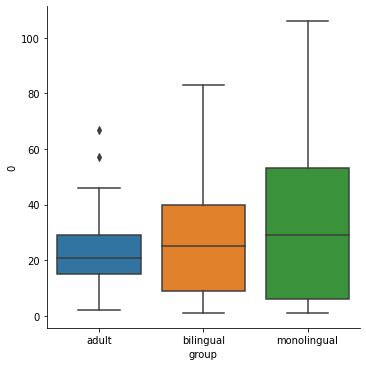

In [73]:
edu_sizes = pd.DataFrame(all_df.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [75]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    print(f'{group}:')
    print(group_df.groupby('segment_id').size().mean())

bilingual:
25.636363636363637
monolingual:
31.71812080536913
adult:
22.304761904761904


### Без знаков препинания

In [14]:
all_df_no_punct = all_df[all_df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]

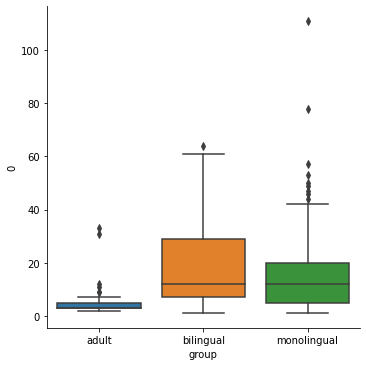

In [15]:
edu_sizes = pd.DataFrame(all_df_no_punct.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [17]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    group_df = group_df[group_df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]
    print(f'{group}:')
    print(group_df.groupby('segment_id').size().mean())

bilingual:
17.72027972027972
monolingual:
16.75
adult:
4.984615384615385


## Среднее количество ЭДЕ на текст

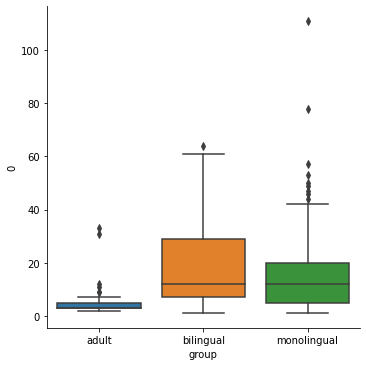

In [18]:
edu_counts = pd.DataFrame(all_df.groupby(['group', 'file']).size())
edu_counts = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_counts, kind='box');

In [19]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    print(f'{group}:')
    print(group_df.groupby('file').size().mean())

bilingual:
356.0
monolingual:
188.14285714285714
adult:
86.4


## Частотность частей речи

### На количество токенов

In [20]:
all_df['upos'].unique()

array(['ADV', 'PUNCT', 'PRON', 'VERB', 'NOUN', 'DET', 'PART', 'INTJ',
       'CCONJ', 'PROPN', 'ADP', 'ADJ', 'NUM', 'AUX', 'SYM', 'X', 'SCONJ'],
      dtype=object)

In [51]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    print(pos)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f'{group}: ',
            len(group_df[group_df['upos'] == pos]) / len(group_df) * 10**6,
              ' ipm')
    print()

ADJ
bilingual:  39606.7415730337  ipm
monolingual:  9870.918754745633  ipm
adult:  9259.25925925926  ipm

CCONJ
bilingual:  40449.43820224719  ipm
monolingual:  7593.014426727411  ipm
adult:  9259.25925925926  ipm

SCONJ
bilingual:  6179.775280898876  ipm
monolingual:  6454.062262718299  ipm
adult:  4629.62962962963  ipm

PART
bilingual:  55337.07865168539  ipm
monolingual:  33788.91419893698  ipm
adult:  20833.333333333332  ipm

NOUN
bilingual:  107865.16853932585  ipm
monolingual:  144646.92482915716  ipm
adult:  166666.66666666666  ipm

VERB
bilingual:  141292.13483146066  ipm
monolingual:  175018.98253606682  ipm
adult:  229166.66666666666  ipm



### На ЭДЕ

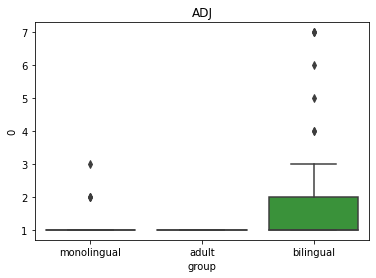

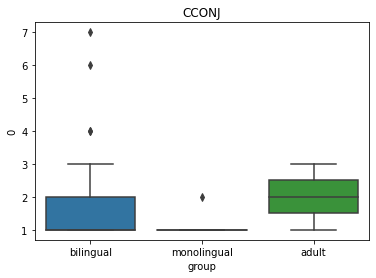

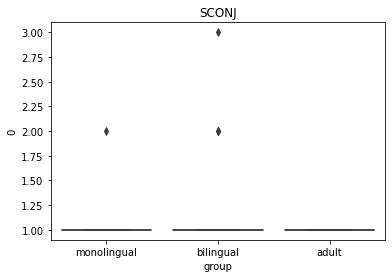

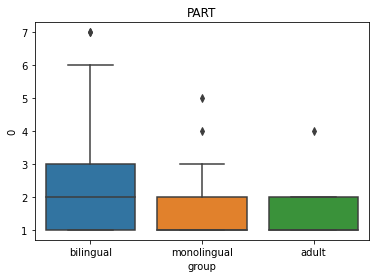

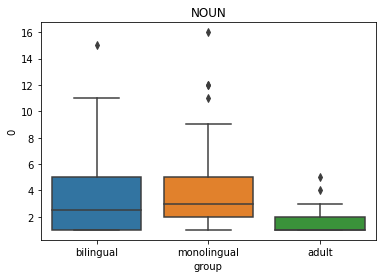

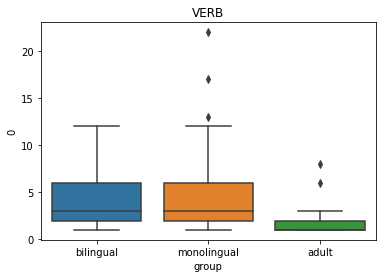

In [52]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    pos_df = pd.DataFrame(all_df[all_df['upos'] == pos].groupby(['segment_id', 'group']).size())
    pos_df = pos_df.reset_index()
    ax = sns.boxplot(x='group', y=0, data=pos_df)
    ax.set_title(f'{pos}')
    plt.show()

In [53]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN', 'VERB']:
    print(pos)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f"{group}: {group_df[group_df['upos'] == pos].groupby('segment_id').size().mean()}")
    print()

ADJ
bilingual: 1.9583333333333333
monolingual: 1.2380952380952381
adult: 1.0

CCONJ
bilingual: 1.7349397590361446
monolingual: 1.0526315789473684
adult: 2.0

SCONJ
bilingual: 1.2222222222222223
monolingual: 1.0625
adult: 1.0

PART
bilingual: 2.2906976744186047
monolingual: 1.459016393442623
adult: 1.8

NOUN
bilingual: 3.310344827586207
monolingual: 3.8877551020408165
adult: 1.6744186046511629

VERB
bilingual: 4.0894308943089435
monolingual: 4.349056603773585
adult: 1.5714285714285714



## Частотность нефинитных форм

### На количество токенов

In [131]:
verb_df = all_df[all_df['upos'] == 'VERB']
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    print(form)
    for group in group_names:
        group_df = verb_df[verb_df['group'] == group]
        print(f'{group}: ',
              len(group_df[group_df['feats'].apply(lambda x: form in x)])
                         / len(group_df) * 10**6,
              ' ipm')
    print()

VerbForm=Fin
bilingual:  937198.0676328503  ipm
monolingual:  925816.0237388724  ipm
adult:  943396.2264150943  ipm

VerbForm=Inf
bilingual:  55555.555555555555  ipm
monolingual:  71216.6172106825  ipm
adult:  47169.81132075472  ipm



### На ЭДЕ

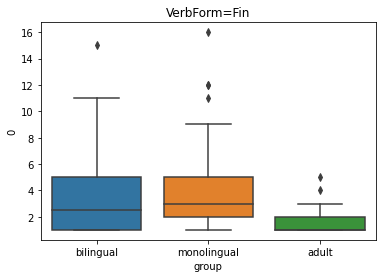

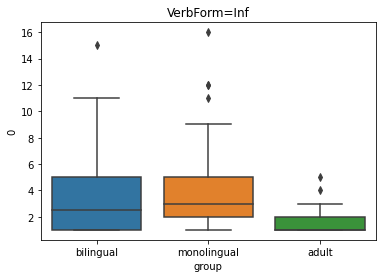

In [47]:
verb_df = all_df[all_df['upos'] == 'VERB']
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    form_df = pd.DataFrame(all_df[all_df['feats'].apply(lambda x: form in x)].groupby(['segment_id', 'group']).size())
    form_df = pos_df.reset_index()
    ax = sns.boxplot(x='group', y=0, data=form_df)
    ax.set_title(f'{form}')
    plt.show()

In [50]:
for form in ['VerbForm=Fin', 'VerbForm=Inf']:
    print(form)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f"{group}: {group_df[group_df['feats'].apply(lambda x: form in x)].groupby('segment_id').size().mean()}")
    print()

VerbForm=Fin
bilingual: 3.894308943089431
monolingual: 4.142857142857143
adult: 1.507936507936508

VerbForm=Inf
bilingual: 1.2272727272727273
monolingual: 2.1904761904761907
adult: 1.25



## Чередование времен

In [149]:
for group in group_names:
    group_df = all_df[all_df['group'] == group]
    tense_changes = []
    curr_file = None
    curr_tense = None
    for i in group_df.iterrows():
        if not curr_file:
            curr_file = i[1]['file']
        else:
            pass

In [147]:
all_df

,id,word,lemma,upos,feats,head,deprel,segment_id,is_prompt,file,group,is_tense_change,asdf
7,1,так,так,ADV,Degree=Pos,0,root,2,1,edu_df/bilingual/Ger_f_5_E.csv,bilingual,0,1
8,2,.,.,PUNCT,_,6,punct,2,1,edu_df/bilingual/Ger_f_5_E.csv,bilingual,0,1
9,3,еще,ещё,ADV,Degree=Pos,6,advmod,2,1,edu_df/bilingual/Ger_f_5_E.csv,bilingual,0,1
10,4,что-нибудь,что-нибудь,PRON,Case=Nom,6,nsubj,2,1,edu_df/bilingual/Ger_f_5_E.csv,bilingual,0,1
11,5,там,там,ADV,Degree=Pos,6,advmod,2,1,edu_df/bilingual/Ger_f_5_E.csv,bilingual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2,емкость,ёмкость,NOUN,Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing,0,root,77,1,edu_df/adult/ad_mon_2.csv,adult,0,1
2140,3,для,для,ADP,_,4,case,77,1,edu_df/adult/ad_mon_2.csv,adult,0,1
2141,4,приготовления,приготовление,NOUN,Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing,2,nmod,77,1,edu_df/adult/ad_mon_2.csv,adult,0,1
2142,5,варенья,варение,NOUN,Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing,4,nmod,77,1,edu_df/adult/ad_mon_2.csv,adult,0,1


## Риторические отношения

In [54]:
bi_df = filter_df(pd.read_csv('bilingual_rst.csv'))
bi_df['group'] = 'bilingual'
mono_df = filter_df(pd.read_csv('monolingual_rst.csv'))
mono_df['group'] = 'monolingual'
ad_df = filter_df(pd.read_csv('adult_rst.csv'))
ad_df['group'] = 'adult'
rst_df = pd.concat([bi_df, mono_df, ad_df])

In [70]:
pd.read_csv('adult_rst.csv')['relname'].unique()

array([nan, 'background', 'sequence', 'span', 'result', 'justify',
       'contrast', 'elaboration', 'preparation', 'joint', 'condition',
       'purpose', 'restatement'], dtype=object)